# $\text{DLCV: PyTorch Tutorial}$

$\text{Prepared by:}$ [$\text{Naveen Venkat}$](http://naveenvenkat.com)$^1$, $\text{Gaurang Sriramanan}$$^2$.

$\text{Video Analytics Lab, Indian Institute of Science, Bangalore.}$

$\small {^1}\text{nav.naveenvenkat@gmail.com}, $
$\small {^2}\text{gaurangs@iisc.ac.in} $


---



## Topics covered here

- Colab basics
- Linear Regression (tensor operations)
- NN Model (nn.Module)
- Autograd (loss optimization)
- Training strategy (data loading / transforms / training loop / LR Scheduling)

## Quick Links

- **Stefan Otte:** [Youtube](https://www.youtube.com/watch?v=_H3aw6wkCv0&t=1s) / [Github](https://github.com/sotte/pytorch_tutorial) (**Highly Recommended**)
- PyTorch: [60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- DLCV: [Slides](https://drive.google.com/file/d/1gHo0eGvSbfTAukrpVIzts4r-zHUX369s/view?ts=5e2665f8)

### More References
([courtesy](https://github.com/sotte/pytorch_tutorial/blob/master/notebooks/foreword.ipynb))
- Twitter: https://twitter.com/PyTorch
- Forum: https://discuss.pytorch.org/
- Tutorials: https://pytorch.org/tutorials/
- Examples: https://github.com/pytorch/examples
- API Reference: https://pytorch.org/docs/stable/index.html
- Torchvision: https://pytorch.org/docs/stable/torchvision/index.html
- PyTorch Text: https://github.com/pytorch/text
- PyTorch Audio: https://github.com/pytorch/audio
- AllenNLP: https://allennlp.org/
- Object detection/segmentation: https://github.com/facebookresearch/maskrcnn-benchmark
- FAIR Sequence-to-Sequence Toolkit (PyTorch): https://github.com/pytorch/fairseq
- FastAI http://www.fast.ai/
- Stanford CS230 Deep Learning notes https://cs230-stanford.github.io

### Visualization Tools
- [TensorboardX](https://tensorboardx.readthedocs.io/en/latest/tutorial.html)
- [Matplotlib](https://matplotlib.org/) / [Seaborn](https://seaborn.pydata.org/examples/index.html)



---



## Google Colab

iPython notebook with a full fledged linux kernel

Use '!' or '%' before a linux shell command


In [0]:
print("iPython Notebook")

iPython Notebook


**Free GPU Access.**

In [0]:
!nvidia-smi

Thu Feb 13 07:28:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

**Install New Packages.**

In [0]:
!sudo apt install cowsay
!ln -s /usr/games/cowsay /usr/bin/cowsay
!cowsay "It's a full-fledged Linux Kernel."

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cowsay is already the newest version (3.03+dfsg2-4).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
ln: failed to create symbolic link '/usr/bin/cowsay': File exists
 ___________________________________
< It's a full-fledged Linux Kernel. >
 -----------------------------------
        \   ^__^
         \  (oo)\_______
            (__)\       )\/\
                ||----w |
                ||     ||


**Navigate through the system.**

In [0]:
%ls ..

bin/                                       etc/    opt/    sys/
boot/                                      home/   proc/   tensorflow-2.1.0/
content/                                   lib/    root/   tmp/
datalab/                                   lib32/  run/    tools/
dev/                                       lib64/  sbin/   usr/
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl  media/  srv/    var/
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl   mnt/    swift/


**Caveat.** Runtime resets after 12 hours of GPU compute. All contents in the RAM / Disk will be cleared.

**Solution.** Use Google Drive to save model states.

In [0]:
from google.colab import drive
drive.mount('/gdrive_dlcv')

In [0]:
# !ls /gdrive_dlcv/"My Drive"
%mkdir /gdrive_dlcv/"My Drive"/dlcv_example
%cd /gdrive_dlcv/"My Drive"/dlcv_example
%pwd

**Note.** The sidebar on the left (top-left, Files button) provides a nice interface to browse folders.

## PyTorch Basics | [Preview](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

In [0]:
# Standard imports for pytorch
import torch
import torch.nn as nn               # Neural Network module
import torch.nn.functional as F     # A functional interface

A straightforward way of using GPU is as follows.

In [0]:
torch.randn(1).cuda()

tensor([0.5895], device='cuda:0')

In [0]:
!nvidia-smi

Thu Feb 13 07:31:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    33W / 250W |    717MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

### Tensors: The atoms of Machine Learning | [Documentation](https://pytorch.org/docs/stable/tensors.html)

Torch tensors are similar to numpy arrays. Think of them as wrappers around numpy arrays, with the ability to be pushed onto GPU memory, and having constructs to define computational graphs.

In [0]:
import numpy as np

numpy_arr = np.random.rand(2, 3, 4)
print('numpy_arr\n',numpy_arr,'\n')

torch_tensor = torch.rand(2, 3, 4)
print('torch_tensor\n',torch_tensor,'\n')

numpy_arr
 [[[0.95285474 0.05352695 0.29484587 0.12978637]
  [0.57402209 0.27446974 0.37925616 0.54452879]
  [0.26790079 0.17351803 0.67307255 0.2073661 ]]

 [[0.95897443 0.44900745 0.81289086 0.80945103]
  [0.96837033 0.09778685 0.09971418 0.61259549]
  [0.77772058 0.70256355 0.08744634 0.04652971]]] 

torch_tensor
 tensor([[[0.9059, 0.2722, 0.3162, 0.3966],
         [0.4677, 0.5194, 0.0407, 0.4732],
         [0.0407, 0.3761, 0.5306, 0.3476]],

        [[0.5020, 0.9219, 0.4249, 0.7185],
         [0.4118, 0.7014, 0.4604, 0.8753],
         [0.5072, 0.4911, 0.9322, 0.9515]]]) 



In [0]:
digits = torch.FloatTensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) # np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=np.float64)
print(digits)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


In [0]:
ones = torch.ones((3, 5)) # np.ones(shape=(3, 5), dtype=np.float64)
print(ones)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


Basic operations: +, -, *, /, **, $sum()$, $prod()$ etc.

(see below for more)

In [0]:
# ones -> (3, 5)
# ones.sum(dim=0) -> (1, 5) or (5) (reduce the dimension)

print(ones.sum(dim=0)) # numpy_arr.sum()
print(torch.sum(ones, dim=0)) # np.sum(arr, axis=0)

tensor([3., 3., 3., 3., 3.])
tensor([3., 3., 3., 3., 3.])


**Cloning** and **In-place** operations (note the last underscore)

In [0]:
print('ones')
print(ones)

ones_clone = ones.clone() # numpy_arr.copy()
ones_clone.zero_() # Also achieved by ones_clone *= 0.

'''
Note: zero_() will be useful when gradients of previous backprop have to be 
cleared for the next backprop (see below)
'''

print('\nones_clone - set to zero')
print(ones_clone)

ones_clone_2 = ones.clone()
ones_clone_2.add_(12)

print('\nones_clone_2 - add 12 in place')
print(ones_clone_2)

ones
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

ones_clone - set to zero
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

ones_clone_2 - add 12 in place
tensor([[13., 13., 13., 13., 13.],
        [13., 13., 13., 13., 13.],
        [13., 13., 13., 13., 13.]])


**Indexing** operations

In [0]:
print('\n', 'digits is', digits)
print('\n', 'digits[3:6] is', digits[3:6])


 digits is tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

 digits[3:6] is tensor([3., 4., 5.])


**Viewing** a tensor with a different shape (Defaults to row-major order).

In [0]:
digits_2d = digits.view(2,5) # np_arr.reshape(2,5)
print(digits_2d)

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])


Transpose & Matrix Multiply

In [0]:
digits_square = torch.FloatTensor([1,2,3,4,5,6,7,8,9]).view(3,3)
print('\ndigits_square\n',digits_square)

digits_square_t = digits_square.t()
print('\ndigits_square_t\n',digits_square_t)

matrix_mul = digits_square_t @ digits_square
print('\nmatrix_mul\n',matrix_mul)


digits_square
 tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

digits_square_t
 tensor([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]])

matrix_mul
 tensor([[ 66.,  78.,  90.],
        [ 78.,  93., 108.],
        [ 90., 108., 126.]])


Broadcasting operations (repeating operations along extra dimensions)

In [0]:
print('--- broadcast scalar operations ---')

fives = torch.ones((3, 5)) * 5
print('\n',fives)

threes = torch.ones((3, 5)) + 2
print('\n',threes)

print('\n', '--- raise to the power ---')
print('\n', threes ** 4)

print('\n', '--- logarithm ---')
print('\n', torch.log(threes))

--- broadcast scalar operations ---

 tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])

 tensor([[3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.]])

 --- raise to the power ---

 tensor([[81., 81., 81., 81., 81.],
        [81., 81., 81., 81., 81.],
        [81., 81., 81., 81., 81.]])

 --- logarithm ---

 tensor([[1.0986, 1.0986, 1.0986, 1.0986, 1.0986],
        [1.0986, 1.0986, 1.0986, 1.0986, 1.0986],
        [1.0986, 1.0986, 1.0986, 1.0986, 1.0986]])


In [0]:
print('\n', '--- element-wise add/subtract ---')
print('\n', fives - threes)

print('\n', '--- element-wise multiply/divide ---')
print('\n', fives * threes)

print('\n', '--- mean / std ---')
print('\n', digits.mean(), digits.std())

print('\n', '--- mean along a given dimension ---')
print('\n', threes.mean(dim=1))

print('\n', '--- minimum / maximum / argmin / argmax ---')
print('\n', digits_2d)
print('\n', digits_2d.max(dim=0)[0])


 --- element-wise add/subtract ---

 tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])

 --- element-wise multiply/divide ---

 tensor([[15., 15., 15., 15., 15.],
        [15., 15., 15., 15., 15.],
        [15., 15., 15., 15., 15.]])

 --- mean / std ---

 tensor(4.5000) tensor(3.0277)

 --- mean along a given dimension ---

 tensor([3., 3., 3.])

 --- minimum / maximum / argmin / argmax ---

 tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

 tensor([5., 6., 7., 8., 9.])


In [0]:
print('\n', '--- broadcast multiplication along the dimension with size 1 ---')

fives_vector = fives[0, :]
print('\n', 'A:\n', fives_vector, 'with shape:', fives_vector.shape) # Shape = (5)

print('\n', 'A.unsqueeze(0):\n', fives_vector.unsqueeze(0), 'with shape:', fives_vector.unsqueeze(0).shape)

print('\n', 'B:\n', threes, 'with shape:', threes.shape) # Shape = (3, 5)

print('\n', 'A * B:\n', fives_vector.unsqueeze(0) * threes, 'with shape:', (fives_vector.unsqueeze(0) * threes).shape)


 --- broadcast multiplication along the dimension with size 1 ---

 A:
 tensor([5., 5., 5., 5., 5.]) with shape: torch.Size([5])

 A.unsqueeze(0):
 tensor([[5., 5., 5., 5., 5.]]) with shape: torch.Size([1, 5])

 B:
 tensor([[3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.]]) with shape: torch.Size([3, 5])

 A * B:
 tensor([[15., 15., 15., 15., 15.],
        [15., 15., 15., 15., 15.],
        [15., 15., 15., 15., 15.]]) with shape: torch.Size([3, 5])


**Obtaining CPU <-> GPU** 

Note: it makes a clone of the tensor - it will copy the computational graph

In [0]:
fives_gpu = fives.cuda() # fives.set_device('cuda:0')
fives_cpu = fives.cpu()

print('fives is on \t', fives.device)
print('fives_gpu is on ', fives_gpu.device)
print('fives_cpu is on ', fives_cpu.device)

# To switch to GPU by default, add this line after imports
# torch.cuda.set_device('cuda:0')

fives is on 	 cpu
fives_gpu is on  cuda:0
fives_cpu is on  cpu


**Obtaining numpy <-> torch**

Note: the numpy version will not retain the computational graph

In [0]:
fives_numpy = fives.numpy()
print('fives_numpy is \t\t\t', type(fives_numpy))

fives_tensor_from_numpy = torch.from_numpy(fives_numpy)
print('fives_tensor_from_numpy is \t', type(fives_tensor_from_numpy))
print()

# Remember to convert to CPU before calling .numpy()
# fives_gpu_numpy = fives_gpu.numpy() # Throws error
# Best way will be as follows
# fives_numpy = fives_gpu.cpu().numpy()

fives_numpy is 			 <class 'numpy.ndarray'>
fives_tensor_from_numpy is 	 <class 'torch.Tensor'>



**The Variable class** 
- In short, Variable was meant to be a wrapper over tensors.
- `variable.data` would contain the tensor 
- `variable.grad` would be used to store the gradient corresponding to the variable.

Deprecated after torch v0.4. Tensors behave exactly like variables.

(stable PyTorch version at the time of writing this notebook: v1.4)

In [0]:
var = torch.autograd.Variable(fives, requires_grad=True)
print(var)
print('\nVariable returns a Tensor object')

tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]], requires_grad=True)

Variable returns a Tensor object


## AutoGrad Basics: Automatic Differentiation Package | [Reference](https://pytorch.org/docs/stable/autograd.html)

- Tensorflow: Define your graph and then you run it
- PyTorch: Create your graph, by running it
    - View outputs live.
    - Change forward prop / backprop / losses on-the-fly
    - Use debugger (set_trace)
- Run forward-prop as regular numpy operations. Backprop is taken care by AutoGrad.

**Linear regression example.** Consider the line: $ y = 3x + 5. $

We will learn this line using linear regression. We start with the line $ f(x, \{m,c\}) = mx + c $. 

Forward prop using data as usual. 

Calculate the loss $L = (y - f(x))^2$ and backpropagate.

During backprop, Autograd calculates $\frac{\delta L}{\delta m}$ and $\frac{\delta L}{\delta c}$ and stores it in `m.grad` and `c.grad`. We access these values to update the parameters.

### Dataset Prep.

In [0]:
def ground_truth(x):
    return 3*x + 5

def get_data(n_samples):
    x = torch.rand((n_samples,))
    y = ground_truth(x)
    return (x,y)

X, Y = get_data(1000)
print('X:', X[:5], '\nY:', Y[:5])

X: tensor([0.3085, 0.8632, 0.4199, 0.0014, 0.1167]) 
Y: tensor([5.9256, 7.5896, 6.2597, 5.0043, 5.3502])


### Learnable Parameters / function
Each tensor is associated with a flag `requires_grad` which signals Autograd to calculate gradients.

In [0]:
random_tensor = torch.rand(1,)
print(random_tensor.requires_grad)

False


Note: Set `requires_grad=True` for any tensor that requires a gradient (eg., $\frac{\delta L}{\delta m}$ is the gradent corresponding to $m$ which is stored in `m.grad`)

In [0]:
m = torch.rand((1,), requires_grad=True) # Set the flag while creating the tensor
c = torch.rand((1,))
c.requires_grad_(True) # Or even after creating it using in-place operation

print('m:', m)
print('c:', c)

def f(x, m, c):
    # f -> m*x + c
    scale = m * x
    shift = scale + c
    # print('\nscale.grad_fn:',scale.grad_fn) # Un-comment these lines to see the grad_fn
    # print('\nshift.grad_fn:',shift.grad_fn) # Un-comment these lines to see the grad_fn
    return shift

m: tensor([0.1936], requires_grad=True)
c: tensor([0.3985], requires_grad=True)


In [0]:
out = f(0.5, m, c)
print('\nout:', out)

out.backward()

print('\nm.grad:', m.grad)
print('\nc.grad:', c.grad)


out: tensor([0.4953], grad_fn=<AddBackward0>)

m.grad: tensor([0.5000])

c.grad: tensor([1.])


**Important Note:** Run the cell above multiple times and see the effect.

Gradients accumulate (add over the previous gradients) by default. Need to clear gradients before the next backward call

In [0]:
out = f(0.5, m, c)
print('out:', out)

m.grad.zero_()
c.grad.zero_()
out.backward()

print('m.grad:', m.grad)
print('c.grad:', c.grad)

out: tensor([0.4953], grad_fn=<AddBackward0>)
m.grad: tensor([0.5000])
c.grad: tensor([1.])


### Create the Training Loop

In [0]:
from IPython.core.debugger import set_trace # Use this to set trace during forward pass / backward pass etc.

# Get data
X, Y = get_data(1000)

dataset = torch.utils.data.TensorDataset(X, Y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16)

# Create Learnable Function
m = torch.rand((1,), requires_grad=True)
c = torch.rand((1,), requires_grad=True)

def f(inp, m, c):
    return inp * m + c

# Set Flags / Settings
max_epochs = 50
lr = 0.01

# Training / Validation Statistics
loss_values = []

# Training Loop
for e in range(max_epochs):

    for dat in dataloader:

        x, y = dat

        if m.grad: m.grad.zero_()
        if c.grad: c.grad.zero_()

        pred = f(x, m, c)
        
        loss = ((y-pred)**2).mean()

        loss.backward() # Calculate grad(loss, m) and grad(loss, c)

        m.data = m.data - lr * m.grad.data
        c.data = c.data - lr * c.grad.data

        loss_values.append(loss.cpu().detach().numpy())
    
    if e%5 == 0:
        print('epoch', e)
        print('new params')
        print('m:',m.data)
        print('c:',c.data)

epoch 0
new params
m: tensor([2.3844])
c: tensor([4.2817])
epoch 5
new params
m: tensor([2.8841])
c: tensor([5.0628])
epoch 10
new params
m: tensor([2.9226])
c: tensor([5.0421])
epoch 15
new params
m: tensor([2.9482])
c: tensor([5.0282])
epoch 20
new params
m: tensor([2.9653])
c: tensor([5.0189])
epoch 25
new params
m: tensor([2.9768])
c: tensor([5.0126])
epoch 30
new params
m: tensor([2.9845])
c: tensor([5.0084])
epoch 35
new params
m: tensor([2.9896])
c: tensor([5.0057])
epoch 40
new params
m: tensor([2.9931])
c: tensor([5.0038])
epoch 45
new params
m: tensor([2.9954])
c: tensor([5.0025])


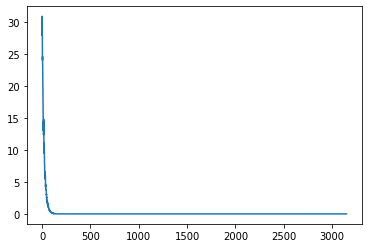

In [0]:
import matplotlib.pyplot as plt

loss_values = np.array(loss_values)
plt.plot(loss_values)
plt.show()

## Neural Network Modules and Optimizers

We can define the learnable parameters as objects of `nn.Parameter()`. These will be listed in `Line.parameters()` and `Line.state_dict()`. This is useful when you want to get a list of all the parameters in a module to, say, save the module state during training.

In [0]:
class Line(nn.Module): # Recommended way 

    def __init__(self):

        super(Line, self).__init__()

        self.m = torch.nn.Parameter((torch.rand(1,))) # Define parameters (these will be listed in Line.parameters() and Line.state_dict())
        self.c = torch.nn.Parameter((torch.rand(1,)))
        self.dummy_variable = torch.rand((3,5))
        # self.dummy_var_parameterized = torch.nn.Parameter(self.dummy_variable)

    def forward(self, x): # Default forward function. Invoked when f(x) is Called (see below).
        return self.m * x + self.c

    def forward2(self, x, k='scale_and_shift'): # Custom forward functions
        if k=='scale_and_shift':
            return self.m * x + self.c
        elif k=='scale_only':
            return self.m * x
        elif k=='shift_only':
            return self.x + self.c
        elif k=='identity':
            return self.x
        else:
            raise NotImplementedError('Not implemented forward2 for k="{}"'.format(str(k)))

Not only does the Line module encapsulate all the necessary variables, the `nn.Module` API is pretty versatile, as shown below.

In [0]:
f = Line()
params = list( f.parameters() )

# Default forward pass - calling the object invokes forward() function.
# print(f(0.4))

# Defining and calling custom forward functions
# f.forward2(x, 'F2')

# Custom forward-pass by accessing the elements of the object
# result = f.m * (0.5) + f.c

for i in params:
    print('\n',i)

print('\n--- state dictionary ---')
print(f.state_dict())


 Parameter containing:
tensor([0.2779], requires_grad=True)

 Parameter containing:
tensor([0.6440], requires_grad=True)

--- state dictionary ---
OrderedDict([('m', tensor([0.2779])), ('c', tensor([0.6440]))])


The size of the training loop significantly reduces using `nn.Module`. Now we can create optimizers which take all trainable parameters and perform the gradient descent `step` at once.

In [0]:
X, Y = get_data(1000)
dataset = torch.utils.data.TensorDataset(X, Y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16)

f = Line()
optimizer = torch.optim.SGD(f.parameters(), lr=0.001) # Pass f's parameters to the optimizer

for e in range(max_epochs):

    for dat in dataloader:

        x, y = dat

        pred = f(x)
        
        loss = ((y-pred)**2).mean()

        # if m.grad: m.grad.data.zero_()
        # if c.grad: c.grad.data.zero_()
        optimizer.zero_grad() # This zeros out the gradients of every parameter that is passed to the optimizer

        loss.backward(create_graph=True) # Calculate grad(loss, m) and grad(loss, c)

        # m.data = m.data - lr * m.grad.data
        # c.data = c.data - lr * c.grad.data
        optimizer.step() # This performs the gradient descent step (including momentum calculations etc.)

    
    if e%5 == 0:
        print('\nepoch', e)
        print('new params')
        print('m:',f.m)
        print('c:',f.c)


epoch 0
new params
m: Parameter containing:
tensor([0.8956], requires_grad=True)
c: Parameter containing:
tensor([1.1062], requires_grad=True)

epoch 5
new params
m: Parameter containing:
tensor([2.0661], requires_grad=True)
c: Parameter containing:
tensor([3.2572], requires_grad=True)

epoch 10
new params
m: Parameter containing:
tensor([2.5888], requires_grad=True)
c: Parameter containing:
tensor([4.2182], requires_grad=True)

epoch 15
new params
m: Parameter containing:
tensor([2.8220], requires_grad=True)
c: Parameter containing:
tensor([4.6477], requires_grad=True)

epoch 20
new params
m: Parameter containing:
tensor([2.9260], requires_grad=True)
c: Parameter containing:
tensor([4.8396], requires_grad=True)

epoch 25
new params
m: Parameter containing:
tensor([2.9722], requires_grad=True)
c: Parameter containing:
tensor([4.9255], requires_grad=True)

epoch 30
new params
m: Parameter containing:
tensor([2.9927], requires_grad=True)
c: Parameter containing:
tensor([4.9640], require

## Train and Eval Mode - BatchNorm example

Recall that BatchNorm for 1D input calculates the following

$$ \frac{(X - \hat{\mu}_i)}{\hat{\sigma_i}} \cdot \gamma + \beta $$

where, $\gamma$ and $\beta$ are the learnable scale and shift parameters, while $\hat{\mu}$ and $\hat{\sigma}$ are the running batch statistics calculated for iteration $i$ as:

$$ \hat{\mu}_i = \alpha \cdot \hat{\mu}_{i-1} + (1-\alpha) \cdot \mu_i $$
$$ \hat{\sigma}_i = \alpha \cdot \hat{\sigma}_{i-1} + (1-\alpha) \cdot \sigma_i $$

and $\mu$ and $\sigma$ are the mean and variance of the batch ($X$). Note that because of the need to calculate running batch statistics the Training and the Testing phases of BatchNorm are different. During Training, the running statistics are updated while at Test time, the statistics are frozen. Thus, we need different modes of execution during Training and Testing phases. This can be achieved using flags inside the module.

In [0]:
class myBatchNorm1d(nn.Module):


    def __init__(self, input_dims, alpha=0.9, track_running_status=True):

        super(myBatchNorm1d, self).__init__()

        # Create running mean and std as trainable parameters
        self.running_mean = nn.Parameter( torch.zeros((input_dims,)), requires_grad=False ) # Note, requires_grad is false
        self.running_std = nn.Parameter( torch.ones((input_dims,)), requires_grad=False ) # Note, requires_grad is false

        # alpha is a constant weight used for the exponential time-average.
        self.alpha = nn.Parameter( torch.FloatTensor([alpha]), requires_grad=False ) # Note, requires_grad is false, but this is defined as a parameter (we want to save this value along with the model)

        # track_running_status is a flag which is used to determine the mode of execution (training / testing). We define it as a parameter because we want 
        # it to be listed in Module.state_dict().
        self.track_running_status = nn.Parameter(torch.ones(1, dtype=torch.bool) * track_running_status, requires_grad=False)

        # Scale and Shift are the trainable parameters (requires_grad=True).
        self.scale = nn.Parameter( (torch.rand((input_dims,))), requires_grad=True ) # Note, requires_grad is false
        self.shift = nn.Parameter( (torch.rand((input_dims,))), requires_grad=True ) # Note, requires_grad is false
        

    def forward(self, x):

        if self.track_running_status:

            m = x.mean(dim=0)
            s = x.std(dim=0)
            alpha = self.alpha
            self.running_mean.data = self.running_mean.data * (alpha) + m.detach() * (1-alpha) # Detach m and s to be used as constants
            self.running_std.data = self.running_std.data * (alpha) + s.detach() * (1-alpha)

            normalized = (x - self.running_mean) / torch.sqrt(  (self.running_std**2) + 1e-10  ) # Adding epsilon (1e-10) for numerical stability.

            output = normalized * self.scale + self.shift
        
        else:

            normalized = (x - self.running_mean) / torch.sqrt(  (self.running_std**2) + 1e-10  )
            output = normalized * self.scale + self.shift


    def train(self):
        self.track_running_status = nn.Parameter(torch.ones(1, dtype=torch.bool) * True, requires_grad=False)


    def eval(self):
        self.track_running_status = nn.Parameter(torch.ones(1, dtype=torch.bool) * False, requires_grad=False)

In [0]:
bn_module = myBatchNorm1d(input_dims=5)
# print(list(bn_module.parameters()))
print(bn_module.state_dict())

OrderedDict([('running_mean', tensor([0., 0., 0., 0., 0.])), ('running_std', tensor([1., 1., 1., 1., 1.])), ('alpha', tensor([0.9000])), ('track_running_status', tensor([True])), ('scale', tensor([0.9347, 0.7057, 0.2425, 0.0082, 0.5353])), ('shift', tensor([0.0707, 0.7157, 0.3098, 0.3806, 0.3252]))])


In train mode, the running statistics update. The following cell does multiple forward passes with BatchNorm in Train mode.

In [0]:
bn_module.train()

for i in range(3):
    r = torch.rand((64,5))
    bn_module(r)
    print('\nrunning_mean:', bn_module.state_dict()['running_mean'])
    print('running_std:', bn_module.state_dict()['running_std'])


running_mean: tensor([0.0635, 0.0458, 0.0531, 0.0461, 0.0448])
running_std: tensor([0.9257, 0.9298, 0.9295, 0.9282, 0.9288])

running_mean: tensor([0.1059, 0.0854, 0.0987, 0.0925, 0.0894])
running_std: tensor([0.8594, 0.8661, 0.8645, 0.8607, 0.8667])

running_mean: tensor([0.1426, 0.1256, 0.1343, 0.1310, 0.1334])
running_std: tensor([0.8041, 0.8132, 0.8081, 0.8033, 0.8109])


In `eval` mode, the running statistics are not updated.

In [0]:
bn_module.eval()

for i in range(3):
    r = torch.rand((64,5))
    bn_module(r)
    print('\nrunning_mean:', bn_module.state_dict()['running_mean'])
    print('running_std:', bn_module.state_dict()['running_std'])


running_mean: tensor([0.1426, 0.1256, 0.1343, 0.1310, 0.1334])
running_std: tensor([0.8041, 0.8132, 0.8081, 0.8033, 0.8109])

running_mean: tensor([0.1426, 0.1256, 0.1343, 0.1310, 0.1334])
running_std: tensor([0.8041, 0.8132, 0.8081, 0.8033, 0.8109])

running_mean: tensor([0.1426, 0.1256, 0.1343, 0.1310, 0.1334])
running_std: tensor([0.8041, 0.8132, 0.8081, 0.8033, 0.8109])


### A note on using `.detach`
The `detach` function returns a copy of the reference to the tensor while removing all information about the gradients and the computational graph (see below, `grad` and `grad_fn` yield `None`). This is useful when you want to treat activations as constants. For eg. we might want to use the output of a module as a weight for the loss function, but may not want backpropagation to happen through the weight. In such a situation, `detach` can be called to obtain a copy of the activation as a constant.

This can also be seen in the BatchNorm module above. Lines 31-32 in class myBatchNorm1d use `m.detach()` and `c.detach()` which ensures that the computational graph is not carried forward while updating the running statistics.

An example showing the effect of `detach` is as follows.

In [0]:
y = torch.rand(1, requires_grad = True)
k = y**2
k.backward()

print(y)
print(y.grad)
print(y.detach().grad)
print(y.detach().grad_fn)

tensor([0.2295], requires_grad=True)
tensor([0.4589])
None
None


**Similarity between `.data` and `.detach`.** Modifying the value of `.detach` or `.data` will modify the contents of the tensor.

In [0]:
# For detach
y = torch.rand(1, requires_grad = True)
k = y**2
k.backward()
print('y:', y)
print('y.grad:', y.grad)

y_detach = y.detach()
print('\ny_detach:', y_detach)
print('y_detach.grad:', y_detach.grad)

print('\n--- after modifying the contents of y_detach ---')

y_detach.zero_() # Modify the contents of y_detach
print('\ny_detach:', y_detach)
print('y:', y) # Contents of y change

y: tensor([0.9689], requires_grad=True)
y.grad: tensor([1.9377])

y_detach: tensor([0.9689])
y_detach.grad: None

--- after modifying the contents of y_detach ---

y_detach: tensor([0.])
y: tensor([0.], requires_grad=True)


In [0]:
# For data
y = torch.rand(1, requires_grad = True)
k = y**2
k.backward()
print('y:', y)
print('y.grad:', y.grad)

y_data = y.data
print('\ny_data:', y_data)
print('y_data.grad:', y_data.grad)

print('\n--- after modifying the contents of y_data ---')

y_data.zero_() # Modify the contents of y_data
print('\ny_data:', y_data)
print('y:', y) # Contents of y change

y: tensor([0.4178], requires_grad=True)
y.grad: tensor([0.8356])

y_data: tensor([0.4178])
y_data.grad: None

--- after modifying the contents of y_data ---

y_data: tensor([0.])
y: tensor([0.], requires_grad=True)


**Difference between `.data` and `.detach`.** If you use `.detach` instead of `.data`, and modify the value of the tensor, PyTorch will throw a Runtime Error during gradient computation involving the tensor that was modified [Forum thread](https://github.com/pytorch/pytorch/issues/6990#issuecomment-384680164). This is useful when you want to prevent errors caused by in-place operations. 

However, modifying `.data` does not throw this error.

Here is an example.

In [0]:
# Detach
y = torch.rand(1, requires_grad = True)
out = torch.exp(y)

out.backward(retain_graph=True)
print(y.grad)

out_detach = out.detach()
print(out_detach.zero_().add_(10))

out.backward() # Throws error suggesting that the value of out (required for gradient computation) has been modified by an in-place operation

tensor([1.8414])
tensor([10.])


RuntimeError: ignored

In [0]:
# Data
y = torch.rand(1, requires_grad = True)
out = torch.exp(y)

out.backward(retain_graph=True)
print(y.grad)

out_data = out.data
print(out_data.zero_().add_(10))

out.backward() # Calculates the gradients 

print(y.grad)

tensor([1.0097])
tensor([10.])
tensor([11.0097])


## MNIST Demo

Here, we will combine all that we have learned till now and train a simple MNIST classifier.

### Load data

- [List of transforms](https://pytorch.org/docs/stable/torchvision/transforms.html) (Key transforms: Normalize, RandomRotatation, RandomFlip, RandomCrop, ToTensor)
- [Other torchvision datasets](https://pytorch.org/docs/stable/torchvision)

Note: ToTensor() converts (0,255) to (0,1) range, and converts `B * H * W * C` to `B * C * H * W`


In [0]:
from torchvision.datasets import MNIST
from torchvision import transforms

transforms = transforms.Compose([
                                #  transforms.RandomRotation(degrees=5),
                                #  transforms.RandomCrop(size=28, padding=4),
                                 transforms.ToTensor()
                                 ])

batch_size = 128

train_dataset = MNIST(root='./mnist_data', download=True, transform=transforms, train=True) # Can use the gdrive path as well: /gdrive_dlcv/My Drive/dlcv/mnist_data
test_dataset = MNIST(root='./mnist_data', download=True, transform=transforms, train=False)
mnist_train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
mnist_test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True)

### Create the model
We will use the Modules defined in `torch.nn` to build a CNN. Note that each layer defined below is a child of `nn.Module`. See the official [Documentation](https://pytorch.org/docs/stable/nn.html) for an exhaustive list of Layers.

In [0]:
class LeNet_Plus(nn.Module):

    def __init__(self):
        super(LeNet_Plus, self).__init__()
        self.conv1 = nn.Conv2d(1,32,kernel_size=5, dilation=1, stride=1, padding=2,bias=True)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32,64,kernel_size=5,dilation=1, stride=1, padding=2,bias=True)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1   = nn.Linear(64*7*7,1024)
        self.fc2   = nn.Linear(1024, 10)

        # The following dictionary will be useful for directly accessing layers / modules
        self.components = {
            'bb': self.conv2,
            'fc': self.fc1,
            'fc2': self.fc2
        }
        
    def forward(self, input):

        # conv1 + max pool
        out = F.relu(self.conv1(input))
        out = self.pool1(out)
        
        # conv2 + max pool
        out = F.relu(self.conv2(out))
        out = self.pool2(out)
        
        # fc-1
        B,C,H,W = out.size()
        out = out.view(B,-1) 
        out = F.relu(self.fc1(out))
        
        # Logits
        out = self.fc2(out) # Note: Softmax is not applied. We will manually apply during loss calculation.
        
        return out

model = LeNet_Plus()

We can use the following functions to save and load models.

In [0]:
def save_model_state_dict(model, filename):
    torch.save(model.state_dict(), filename)

def load_model_state_dict(model, filename):
    sd = torch.load(filename)
    model.load_state_dict(sd)

### Execute the train loop

In [0]:
model = LeNet_Plus().cuda() # Note: Cuda!
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

max_epochs = 20
max_accuracy = 0.

load_model = False

if load_model == True:
    msd = torch.load('best_model')
    model.load_state_dict(msd)
    osd = torch.load('best_optimizer')
    optimizer.load_state_dict(osd)

for e in range(1, max_epochs+1):

    # SET THE MODEL TO TRAIN
    model.train()

    for dat in mnist_train_dataloader:

        x, y = dat
        n = x.shape[0]

        x = x.cuda() # Note: Cuda!
        y = y.cuda()

        pred = model(x)

        ''' Method-1 : Manually get the loss '''
        # pred_s = F.softmax(pred, dim=-1) # broadcast softmax operation over entire matrix, taking softmax along dim=-1 (last dimension)
        # loss_matrix = - torch.log(pred_s)
        # total_loss = 0
        # for i in range(n):
        #     total_loss += loss_matrix[i, y[i]]
        # loss = total_loss / n

        ''' Method-2 : Convert y into a One-hot vector and broadcast '''
        # pred_s = F.softmax(pred, dim=-1)
        # loss_matrix = - torch.log(pred_s)
        # y_one_hot = F.one_hot(y, num_classes=10) # B x 10
        # total_loss = (y_one_hot * loss_matrix).sum(dim=-1).sum()
        # loss = total_loss / n

        ''' Method-3 : nn / functional inbuilt losses '''
        loss_fn = nn.CrossEntropyLoss(reduction='sum')
        total_loss = loss_fn(pred, y) # Note, softmax is calculated internally
        loss = total_loss / n

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    # SET THE MODEL TO EVAL
    model.eval()
    
    total_correct = 0.
    total_count = 0.

    with torch.no_grad():

        for dat in mnist_test_dataloader:

            x, y = dat

            x = x.cuda()
            y = y.cuda()

            p = model(x)
            highest_act, pred_label = torch.max(p, dim=-1)

            total_correct += (pred_label == y).sum()
            total_count += x.shape[0]

    print('\nepoch', e)
    acc = total_correct / total_count
    print('Test accuracy:', acc)

    # Condition to save the model / optimizer state
    if acc > max_accuracy:
        max_accuracy = acc
        torch.save(model.state_dict(), 'best_model')
        torch.save(optimizer.state_dict(), 'best_optimizer')


epoch 1
Test accuracy: tensor(0.8844, device='cuda:0')

epoch 2
Test accuracy: tensor(0.9208, device='cuda:0')

epoch 3
Test accuracy: tensor(0.9445, device='cuda:0')

epoch 4
Test accuracy: tensor(0.9543, device='cuda:0')

epoch 5
Test accuracy: tensor(0.9647, device='cuda:0')

epoch 6
Test accuracy: tensor(0.9694, device='cuda:0')

epoch 7
Test accuracy: tensor(0.9706, device='cuda:0')

epoch 8
Test accuracy: tensor(0.9741, device='cuda:0')

epoch 9
Test accuracy: tensor(0.9771, device='cuda:0')

epoch 10
Test accuracy: tensor(0.9781, device='cuda:0')

epoch 11
Test accuracy: tensor(0.9804, device='cuda:0')

epoch 12
Test accuracy: tensor(0.9819, device='cuda:0')

epoch 13
Test accuracy: tensor(0.9822, device='cuda:0')

epoch 14
Test accuracy: tensor(0.9827, device='cuda:0')

epoch 15
Test accuracy: tensor(0.9843, device='cuda:0')

epoch 16
Test accuracy: tensor(0.9847, device='cuda:0')

epoch 17
Test accuracy: tensor(0.9842, device='cuda:0')

epoch 18
Test accuracy: tensor(0.9847, 

## CIFAR10 Demo - Torchvision Models | Finetuning

### Load the data


In [0]:
from torchvision.datasets import CIFAR10
from torchvision import transforms

train_transforms = transforms.Compose([ 
                                 # Here, we add some augmentations as well for the training data
                                 transforms.RandomRotation(degrees=5),
                                 transforms.RandomCrop(size=32, padding=4),
                                 transforms.ToTensor()
                                 ])

test_transforms = transforms.Compose([ 
                                # For test images, we do not add augmentations
                                #  transforms.RandomRotation(degrees=5),
                                #  transforms.RandomCrop(size=32, padding=4),
                                 transforms.ToTensor()
                                 ])

batch_size = 32

train_dataset = CIFAR10(root='./cifar_data', download=True, transform=train_transforms, train=True)
test_dataset = CIFAR10(root='./cifar_data', download=True, transform=test_transforms, train=False)
cifar_train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
cifar_test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


### Get the model

In [0]:
from torchvision.models import resnet18

model = resnet18(pretrained=True) # Initialized from ImageNet

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


We will use the backbone network as ResNet18 (upto the last layer). `model.children()` returns a generator to enumerate all submodules (objects of `nn.Module`) in the model.

In [0]:
print(model)

children = list(model.children())
print('\nNumber of submodules:', len(children))

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Now we create a custom model using the resnet18 backbone, with FC layers at the end. 

**Using Sequential.** `nn.Sequential` composes the given list of `Modules` into a single `Module`. We will use this to create a single module called `self.bb` which will have all layers of resnet18 except the last FC layer (see L13-15 below).

**Using `.children()` / `.modules()`.** Here is a [discussion](https://discuss.pytorch.org/t/module-children-vs-module-modules/4551/8) on `model.children()` and `model.modules()`. 

Specifically, `model.modules()` also returns `model` as a `Module` (the `model` itself is a module), and recursively enumerates the modules contained within `model` ([reference](https://discuss.pytorch.org/t/module-children-vs-module-modules/4551/2)).

However, `model.children()` does not recursively enumerate. It just lists the modules inside `model` ([reference](https://discuss.pytorch.org/t/module-children-vs-module-modules/4551/4))

This is in contrast to `model.parameters()` which returns each `Parameter()` in the model ([forum](https://discuss.pytorch.org/t/list-child-parameters/19702/3)).

In [0]:
class CustomModel(nn.Module):

    def __init__(self, train_backbone=False, pretrained=False):
        super(CustomModel, self).__init__()

        self.train_backbone = train_backbone # We can optionally set flags to train backbone etc.

        resnet = resnet18(pretrained=pretrained) # Initialized from ImageNet - tuned to CIFAR10. 
        # Note: the class ResNet18 (defined in torchvision.models) is a child of nn.Module
        # Also, the variable resnet defined above will not show up in model.state_dict() as it is a local variable.
        # Had it been self.resnet = resnet18(), it is an element of the CustomModel object, and will show up in model.state_dict()

        list_of_layers = list(resnet.children())[:-1] # List every layer but the last fc layer

        self.bb = nn.Sequential(*list_of_layers) 
        # Note the asterisk. nn.Sequential does not take a list as input, rather requires each Module to be passed as a separate argument.
        
        self.fc1 = nn.Linear(512, 10)

        # We can add more layers
        # self.fc1 = nn.Linear(512, 256)
        # self.act1 = nn.ELU()
        # self.fc2 = nn.Linear(256, 10) # etc.
    
    def forward(self, x):

        if self.train_backbone:
            bb = self.bb(x)
        else:
            with torch.no_grad(): # Speeds up computation
                bb = self.bb(x)
            bb = bb.detach() # Optional, if no_grad context is used
        flat = bb.squeeze()
        f1 = self.fc1(flat)

        return f1
    
    def set_mode_train(self):

        if self.train_backbone:
            self.bb.train()
            self.fc1.train()
        
        else:
            self.bb.eval()
            self.fc1.train()
    
    def set_mode_eval(self):

        self.eval()

In [0]:
''' Train the entire model '''
model = CustomModel(train_backbone=True, pretrained=False).cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)

''' Initialize from ImageNet and set a Low LR for backbone '''
# model = CustomModel(train_backbone=True).cuda()
# optimizer = torch.optim.SGD(
#     [{'params':model.fc1.parameters(), 'lr':1e-2, 'momentum':0.9},
#      {'params':model.bb.parameters(), 'lr':1e-4, 'momentum':0.9}]
#     )

''' Finetune the last layer '''
# model = CustomModel(train_backbone=False).cuda()

# # Method-1
# optimizer = torch.optim.SGD(model.fc1.parameters(), lr=1e-2, momentum=0.9) # Pass the parameters of FC layer

# # Method-2
# # optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9) # This is fine here, since we handle the foward pass for the backbone using train_backbone flag)

max_epochs = 50
max_accuracy = 0.

# Set load_model to true to continue training from the previous best state
load_model = False

if load_model == True:
    msd = torch.load('best_model')
    model.load_state_dict(msd)
    osd = torch.load('best_optimizer')
    optimizer.load_state_dict(osd)

for e in range(1, max_epochs+1):

    # SET THE MODEL TO TRAIN (Backbone is in eval as it contains batchnorm etc.)
    model.set_mode_train()

    for dat in cifar_train_dataloader:

        x, y = dat
        n = x.shape[0]

        x = x.cuda()
        y = y.cuda()

        pred = model(x)

        # Method-1 : Manually get the loss
        # pred_s = F.softmax(pred, dim=-1) # broadcast softmax operation over entire matrix, taking softmax along dim=-1 (last dimension)
        # loss_matrix = - torch.log(pred_s)
        # total_loss = 0
        # for i in range(n):
        #     total_loss += loss_matrix[i, y[i]]
        # loss = total_loss / n

        # Method-2 : Convert y into a One-hot vector and broadcast
        # pred_s = F.softmax(pred, dim=-1)
        # loss_matrix = - torch.log(pred_s)
        # y_one_hot = F.one_hot(y, num_classes=10)
        # total_loss = (y_one_hot * loss_matrix).sum(dim=-1).sum()
        # loss = total_loss / n

        # Method-3 : nn / functional inbuilt losses
        loss_fn = nn.CrossEntropyLoss(reduction='sum')
        total_loss = loss_fn(pred, y) # Note, softmax is calculated internally
        loss = total_loss / n

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        # break

    # SET THE MODEL TO EVAL
    model.set_mode_eval()
    
    total_correct = 0.
    total_count = 0.

    with torch.no_grad():

        for dat in cifar_test_dataloader: # In practice, use a validation set (not the test set!)

            x, y = dat

            x = x.cuda()
            y = y.cuda()

            p = model(x)
            highest_act, pred_label = torch.max(p, dim=-1)

            total_correct += (pred_label == y).sum()
            total_count += x.shape[0]
            # break

    print('\nepoch', e)
    acc = total_correct / total_count
    print('Test accuracy:', acc)

    if acc > max_accuracy:
        max_accuracy = acc
        torch.save(model.state_dict(), 'best_model')
        torch.save(optimizer.state_dict(), 'best_optimizer')
    
    # Reducing learning rate every 5 epochs
    if e % 5 == 0:
        for param_group in optimizer.param_groups:
            param_group['lr'] /= 10


epoch 1
Test accuracy: tensor(0.3658, device='cuda:0')

epoch 2
Test accuracy: tensor(0.3984, device='cuda:0')

epoch 3
Test accuracy: tensor(0.5030, device='cuda:0')

epoch 4
Test accuracy: tensor(0.5474, device='cuda:0')

epoch 5
Test accuracy: tensor(0.5882, device='cuda:0')

epoch 6
Test accuracy: tensor(0.6486, device='cuda:0')

epoch 7
Test accuracy: tensor(0.6546, device='cuda:0')

epoch 8
Test accuracy: tensor(0.6422, device='cuda:0')

epoch 9
Test accuracy: tensor(0.6638, device='cuda:0')

epoch 10
Test accuracy: tensor(0.6752, device='cuda:0')

epoch 11
Test accuracy: tensor(0.6836, device='cuda:0')

epoch 12
Test accuracy: tensor(0.6863, device='cuda:0')

epoch 13
Test accuracy: tensor(0.6893, device='cuda:0')

epoch 14
Test accuracy: tensor(0.6891, device='cuda:0')

epoch 15
Test accuracy: tensor(0.6938, device='cuda:0')

epoch 16
Test accuracy: tensor(0.6929, device='cuda:0')

epoch 17
Test accuracy: tensor(0.6889, device='cuda:0')

epoch 18
Test accuracy: tensor(0.6870, 


## Some helpful nn Modules

In [0]:
class myReLU(nn.Module):

    def __init__(self):
        super(myReLU, self).__init__()
        self.saved_activation = None
    
    def forward(self, inp):
        self.saved_activation = inp.detach() # We detach it, as we only need to refer to the magnitude of the activations
        return inp.clamp(min=0)

    def backward(self, inp_grad):
        grad = inp_grad.clone()
        grad[self.saved_activation < 0] = 0
        return grad

In [0]:
class GradChange(nn.Module): # Useful for gradient reversal (eg. GAN training), gradient diminishing (eg. similar to having a low lr for backbone if using SGD without momentum)

    def __init__(self, factor, requires_grad=False):
        super(GradChange, self).__init__()
        self.factor = nn.Parameter(data=factor, requires_grad=requires_grad)
    
    def forward(self, x):
        return x

    def backward(self, x):
        return self.factor * x